# Project: Investigate Database_Soccer

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains two csv files, the first is "player" and the second is "player_attributes". The "player" csv files contains personal information about each player such as name, birth date, etc. The second file "player_attributes" which contains Players attributes sourced from EA Sports' FIFA video game series from 2007 to 2016, including the weekly updates. So, I will try to join the two files and make my analysis.


### Question(s) for Analysis
As I mentioned above, I will try to join the "player" csv file with the "player attributes" csv file, to form just one dataset, and then I inspect it and figure out some questions, and then use pandas, numpy and matplotlib or seaborn or plotely express to not onyl find the answers to these question, but also make a suitable visualization of my answers. Some of the questions such as:
Who were the top eleven players?
Who were the top rated "Goalkeepers"?
Who were the "Defenders" with the highest rating ?
Who were the "Midfielders" with the highest rating?
Who were the "Forwards" with the highest rating ?
Which players had the highest penality kicking rating ?
Who was the tallest player (in Centimeters) ?
How does the Overall rating correlate with other players attributes ?
Who was the fastest player ?
What was the most prefered foot between players (Right foot or Left foot ) ?, and 
At which year did EA Sports' FIFA video game company make the most updates on players_attributes ? 



At first we load the required libraries to be used in our project.

In [1]:
# Downloading plotly express library for data visualization
#! pip install plotly_express==0.4.0 
# Upgrade pandas to use dataframe.explode() function. 
#! pip install --upgrade pandas==0.25.0

In [2]:
# Loading required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

Let's read our "player" and "player_attributes" csv files and save them in "df_player" and "df_player_attributes" dataframes.

In [3]:
# Loading our data 
df_player = pd.read_csv('../input/football-players/Player.csv')
df_player_attributes = pd.read_csv('../input/football-players/Player_Attributes.csv')

In [4]:
df_player.head()
df_player_attributes.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0



### Data Cleaning 

Let's check if our datasets contain "null" values or not?, and if the datasets contain "null" values we will process these "null" values to get a clean datasets

In [5]:
# check null values for (df_player)
df_player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [6]:
# check null values for (df_player_attributes)
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [7]:
# Removing rows with null values from (df_player_attributes) dataset
df_player_attributes.dropna(inplace = True)

In [8]:
# Check, if the rows with null values were deleted or not?! 
df_player_attributes.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


So, after checking the dataset for the null values, we found that the (df_player) has no any null values, but (df_player_attributes) has many null values in many columns, and as we can't get the exact values of these features, we decided to remove the rows with the null values, to make our data clean.

                         ---------------------------------------------

Let's check if our datasets contain "duplicated" values or not?, and if the datasets contain "duplicated" we will process these "duplicated" values to get a clean datasets.

In [9]:
# Check duplicates for (df_player)
df_player.duplicated().sum()

0

In [10]:
# Check duplicates for (df_player)
df_player_attributes.duplicated().sum()

0

So we are lucky, and we hav not any duplicates in our datasets

                              - - - - - - - - - - - - - - - - -

Now let's check the data types of our datasets columns, and fix these types if needed.

In [11]:
# Check datatypes for "df_player"
df_player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [12]:
# For df_player dataset
# Let's convert "height" from string to float, and
# convert birthday from object to date.
df_player['height'] = df_player['height'].astype('int64')
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

In [13]:
# Check if they were converted or not
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  int64         
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 605.0+ KB


In [14]:
# Check datatypes for "df_player_attributes"
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve            

In [15]:
# convert "date" column from string datatype to date datatype
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

Before EDA, We must join df_player dataset with the df_player_attributes together to form just one dataset that contains all the needed information, let's do that!..

In [16]:
# Joining df_player with df_player_attributes using pd.merge method
df = pd.merge(df_player, df_player_attributes, on=['player_fifa_api_id', 'player_api_id'])

In [17]:
# Deleting unnecessary columns
df.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id'], inplace = True)

Now we gonna make a new columns that we can use in our analysis later on.

In [18]:
# Extract the years from the date, and put these years into a new column "year"
df['year'] = df['date'].dt.year

In [19]:
df.head(1)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,Aaron Appindangoye,1992-02-29,182,187,2016-02-18,67.0,71.0,right,medium,medium,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016


<a id='eda'></a>
## Exploratory Data Analysis

Now, we will move to the analysis phase, we will try to ask some questions and find answers to them, and by that we can analysis our data and we can make a strong conclusion about our findings.
              ___________________________________________________________





Now we can create a function that used some dataframe inputs, analyis the data, and then plot our result

In [20]:
def myTopPlot(df, grpVar, yVar, stat = 'max', cols = None, top = 10, position = None):
    ''' This function used to take the dataframe, make the suitable analysis 
        then plot the result
        
        Inputs: df (dataframe)
                grpVar (specifc column in the dataframe say 'player_name')
                yVar (specifc column in the dataframe say 'overall_rating')
                stat (agg type,for example say 'max' to get the maximum overall rating)
                cols (columns selected from the dataframe)
                top (number of players)
                position (player position , for example : Goalkeeper)
        Outputs:
                Bar_chart of the results, and         
        '''
    
    if cols:
        tmp = df[cols].copy()
        tmp[yVar] = tmp[ [x for x in cols if x!= grpVar] ].mean(axis=1).round()
    else:
        tmp = df.copy()

    data = tmp.groupby([grpVar])[yVar].agg(stat).round().nlargest(top).reset_index()
    
    
    title = f"Top {top} {position}"
    
    # Data visualization using plotly express
    bar_chart = px.bar(data, x = grpVar, y= yVar, title = title, 
                       color = grpVar,text = yVar).update_layout(
                       xaxis_title = f"{grpVar.replace('_',' ')}".title(), 
                       yaxis_title=f"{yVar.replace('_',' ')}".title() 
                       )
    bar_chart.show()   
    return data                

                      ************************************************

### Research Question 1: Who were the top eleven players?
Note: The players will not be duplicated over the years (Only unique players will be displayed), for example if Lionel Messi has the highest rating in more than year we will take his highest rating only one time, and this method will be used for the rest of the questions.

In [21]:
myTopPlot(df, 'player_name', 'overall_rating')

,player_name,overall_rating
0,Lionel Messi,94.0
1,Cristiano Ronaldo,93.0
2,Gianluigi Buffon,93.0
3,Wayne Rooney,93.0
4,Gregory Coupet,92.0
5,Xavi Hernandez,92.0
6,Alessandro Nesta,91.0
7,Andres Iniesta,91.0
8,Iker Casillas,91.0
9,John Terry,91.0


---> We notice that the Argentinian player "Lionel Messi" had the highest overall rating among the players during the ten years from 2007 to 2016.

                ***********************************************************

### Research Question 2 : Who were the top rated "Goalkeepers"?
To answer this question, we should collect the Goalkeepers attributes from the dataset and then put them into another dataset, then analysis this new dataset to get the top 5 "goal keepers".

Note: We will take only the highest rating of the players over the ten years (from 2007 to 2016).

In [22]:
# Consider the following goalkeeper attributes :
# gk_diving ,gk_handling ,gk_kicking, gk_positioning, and gk_reflexes are the most important features for a good goalkeeper, 
# and let's get the top 10 goalkeepers ratings through them.
GK_attributes = ['player_name','gk_diving','gk_handling','gk_kicking','reactions',
                 'gk_positioning', 'gk_reflexes']

In [23]:
myTopPlot(df, 'player_name', 'overall_rating', cols = GK_attributes, position='Goalkeepers')

,player_name,overall_rating
0,Gianluigi Buffon,90.0
1,Gregory Coupet,88.0
2,Iker Casillas,88.0
3,Manuel Neuer,88.0
4,Petr Cech,88.0
5,Julio Cesar,87.0
6,David De Gea,86.0
7,Sebastian Frey,86.0
8,Edwin van der Sar,85.0
9,Mickael Landreau,85.0


---> We notice that the Italian goalkeeper "Gianluigi Buffon" had the highest average rating among the rest of goalkeepers during the ten years from 2007 to 2106. 

                  **************************************************

### Research Question 3 : Who were the "Defenders" with the highest rating ?

To answer this question, we should collect the "Defenders" attributes from the dataset and then put them into another dataset, then analysis this new dataset to get the top ten "Defenders".

In [24]:
# Let's select Defending attributes and save it in a new dataframe
Df_attributes = ['player_name', 'jumping','stamina','strength','aggression',
                    'interceptions','marking','standing_tackle','sliding_tackle','positioning', 'reactions']

In [25]:
myTopPlot(df, 'player_name', 'overall_rating', cols = Df_attributes, position='Defenders')

,player_name,overall_rating
0,Carles Puyol,90.0
1,John Terry,90.0
2,Alessandro Nesta,88.0
3,Esteban Cambiasso,88.0
4,Jamie Carragher,88.0
5,Michael Essien,88.0
6,Nemanja Vidic,88.0
7,Patrick Vieira,88.0
8,Giorgio Chiellini,87.0
9,Kolo Toure,87.0


---> here, we notice that the English defender "John Terry" and the Spanish defender ""Carles Puyol" reached to the highest defending rating during the ten years from 2007 to 2016.

                        **************************************************

### Research Question 4 : Who were the "Midfielders" with the highest rating?

To answer this question, we should collect the "Midfielders" attributes from the dataset and then put them into another dataset, then analysis this new dataset to get the top 10 "Midfielders".

In [26]:
# Let's save the most important features of the midfielder in a list
Mid_attributes = ['player_name','short_passing', 'long_passing', 'ball_control', 
                    'agility', 'balance', 'stamina','crossing', 'vision','interceptions']

In [27]:
# Display results
myTopPlot(df, 'player_name', 'overall_rating', cols=Mid_attributes, position= 'Midfielders')

,player_name,overall_rating
0,Xavi Hernandez,91.0
1,Andres Iniesta,90.0
2,Cesc Fabregas,89.0
3,Andrea Pirlo,88.0
4,Luka Modric,87.0
5,Philipp Lahm,87.0
6,Deco,86.0
7,Francesco Totti,86.0
8,Franck Ribery,86.0
9,Frank Lampard,86.0


---> So, the Spanish midfielder "Xavi Hernandez" had the highest rating during the ten years from 2007 to 2016

                    *****************************************************

### Research Question 5 : Who were the "Forwards" with the highest rating ?

To answer this question, we should collect the "Forwards" attributes from the dataset and then put them into another dataset, then analysis this new dataset to get the top ten "Forwards".

In [28]:
# Let's save the most important features of the Forward in a list
Fw_attributes = [
                 'player_name', 'ball_control', 'finishing', 'heading_accuracy', 
                 'balance', 'agility', 'stamina'
                ]

In [29]:
myTopPlot(df, 'player_name', 'overall_rating', cols=Fw_attributes, position= 'Forwards')

,player_name,overall_rating
0,Cristiano Ronaldo,90.0
1,Lionel Messi,89.0
2,Wayne Rooney,87.0
3,Didier Drogba,86.0
4,Edinson Cavani,86.0
5,Lisandro Lopez,86.0
6,Zlatan Ibrahimovic,86.0
7,Carlos Tevez,85.0
8,David Villa,85.0
9,Diego Milito,85.0


### Research Question 6 : Which players had the highest penality kicking rating ?


In [30]:
Top_penality_kickers = df.groupby('player_name')['penalties'].max().nlargest(6)

In [31]:
# Top5_penality_kickers dataframe
Top_five_penality_kickers = pd.DataFrame({'Player_name':Top_penality_kickers.index,
                                        'Highest_rating':Top_penality_kickers.values})

In [32]:
Top_five_penality_kickers

,Player_name,Highest_rating
0,Rickie Lambert,96.0
1,Andrea Pirlo,95.0
2,Mario Balotelli,95.0
3,Paul Scholes,95.0
4,Xavi Hernandez,95.0
5,Adrian Mutu,94.0


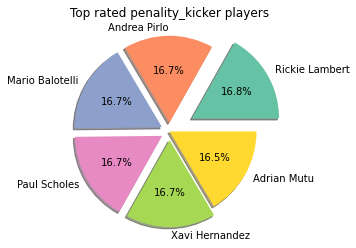

In [33]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(Top_five_penality_kickers.Highest_rating, labels = Top_five_penality_kickers.Player_name,
        explode=[0.3, 0.1, 0.1, 0.1, 0.1,0] ,colors = palette_color,autopct ='%.1f%%', shadow = True)
plt.title("Top rated penality_kicker players")        
  
# displaying chart
plt.show()

---> So, the English  Centre-Forward "Rickie Lambert" was in the lead during the ten years from 2007 to 2016.

                  ********************************************************

### Research Question 7 : Who was the tallest player (in Centimeters) ?


In [34]:
# Let's find the tallest player
Most_tallest_player = df.groupby('player_name')['height'].max().nlargest(1)


In [35]:
# Tallest player datafram
Tallest_player = pd.DataFrame({'Player_name':Most_tallest_player.index,
                                  "Player_height":Most_tallest_player.values})

In [36]:
Tallest_player

,Player_name,Player_height
0,Kristof van Hout,208


We notice that the Belgian Goalkeeper "Kristof van Hout" was the tallest player.

### Research Question 8 : What was the most prefered foot between players (Right foot or Left foot ) ?


In [37]:
Right_lef_foot = df['preferred_foot'].value_counts()

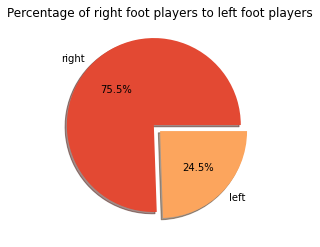

In [38]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('RdYlGn')
  
# plotting data on chart
plt.pie(Right_lef_foot.values, labels = Right_lef_foot.index,explode=[0.1, 0.0] ,colors = palette_color, 
        autopct ='%.1f%%', shadow = True)
plt.title("Percentage of right foot players to left foot players")  
# displaying chart
plt.show()

From the pie chart above we can notice that the right_foot player were dominant in numbers by 75.5%

                ******************************************************

 ### Research Question 9 : Which players had the most Freekick accuracy ?

In [39]:
# Let's select players with the highest freekick accuracy
Top_freekick_players = df.groupby('player_name')['free_kick_accuracy'].max().nlargest(6).round(1)

In [40]:
# Now we can create our dataframe containing the players with the highest freekick accuracy
df_top_freekick_players = pd.DataFrame({'Player_name': Top_freekick_players.index,
                                        'Freekick_accuracy': Top_freekick_players.values})

In [41]:
df_top_freekick_players

,Player_name,Freekick_accuracy
0,"Juninho Pernambucano,20",97.0
1,Alessandro Del Piero,96.0
2,David Beckham,96.0
3,Hakan Calhanoglu,95.0
4,Andrea Pirlo,94.0
5,Cristiano Ronaldo,94.0


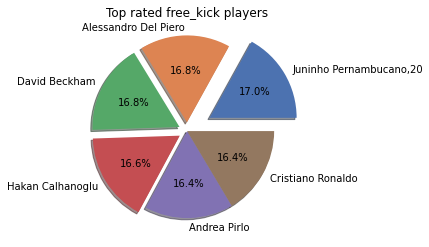

In [42]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('deep')
  
# plotting data on chart
plt.pie(df_top_freekick_players.Freekick_accuracy, labels = df_top_freekick_players.Player_name,
        explode=[0.3, 0.1, 0.1, 0.1, 0,0] ,colors = palette_color,autopct ='%.1f%%', shadow = True)
plt.title("Top rated free_kick players")        
#  displaying chart
plt.show()

So, the Brazilian midfielder "Juninho Pernambucano" was the player with highest freekick accuracy.

                    ******************************************************

 ### Research Question 10 : Who were the fastest players ?
 

In [43]:
# Creating fast players dataframe
Fast_players_attributes = ['player_name', 'sprint_speed']
Fast_players = df[Fast_players_attributes] 
Fast_players['Speed_rating'] = (Fast_players.sprint_speed)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# Select the fastest players
Fastest_palyers = df.groupby('player_name')['sprint_speed'].max().nlargest(10)

In [45]:
# Creating our dataframe
Top_fastest_players = pd.DataFrame({'Player_name':Fastest_palyers.index,
                                     'speed_rating':Fastest_palyers.values})

In [46]:
Top_fastest_players

,Player_name,speed_rating
0,David Odonkor,97.0
1,Mathis Bolly,97.0
2,Gabriel Agbonlahor,96.0
3,Ivan Cordoba,96.0
4,Jonathan Biabiany,96.0
5,Pierre-Emerick Aubameyang,96.0
6,Theo Walcott,96.0
7,Aaron Lennon,95.0
8,DaMarcus Beasley,95.0
9,Gareth Bale,95.0


---> here, we notice that the player "Mathis Bolly" from Côte d'Ivoire (Ivory Coast) and "David Odonkor" from Germany were the fastest players.

                   ******************************************************

### Research Question 11 : At which year did EA Sports' FIFA video game company make the most updates on players_attributes ? 


In [47]:
Year = df['year'].value_counts()

In [48]:
# Using plotely express for visualizing our answer
Pie_chart = px.pie(values = Year.values, labels= Year.index, hover_name = Year.index,
            title='Number of player_attributes update for each year', names= Year.index)
Pie_chart.update_traces(textposition='inside', textinfo='percent+label')
Pie_chart.update_traces(pull=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Pie_chart.show()

---> We notice that "2013" had the most number of player_attributes updates by EAsports Fifa gaming company.

              *****************************************************************

### Research Question 12 : How does the Overall rating correlate with other players attributes ?


To answer this question, let's get the correlation of the overall rating with other attributes

In [49]:
df_corr_matrix = df.corr(method='pearson')

In [50]:
df_corr_matrix[['overall_rating']]

,overall_rating
height,-0.004009
weight,0.063879
overall_rating,1.000000
potential,0.765354
crossing,0.357110
finishing,0.329897
heading_accuracy,0.313816
short_passing,0.458174
volleys,0.361612
dribbling,0.353983


Now we can see that the "Overall rating" has a strong correlation with "Potential" attribute, "Potential" attribute means the ability of the player to develop, so it's logical that the "Overall rating" has this strong relationship with "Potential" attribute. To explain this idea farther more, let's take a player from our dataset, say "Kaka", and see how the "Potential" has a very strong effect on player progress, which here means increasing player "Overall rating"..

In [51]:
# Filter our data to contain information only about "Lionel Messi"
Kaka = df[df['player_name'] == 'Kaka']

In [52]:
# reset index to start from 0 to 1, 2, 3, etc.....
Kaka.reset_index(inplace = True)
del(Kaka['index'])

In [53]:
# Beacouse the updates dates are ordered randomly so our data is out of order,
# so let's order our data by date
Kaka= Kaka.sort_values(['date'])

In [54]:
# Now our data is in order by date
Kaka.head()

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
53,Kaka,1981-05-16,185,174,2007-02-22,68.0,70.0,right,medium,medium,...,50.0,63.0,68.0,68.0,3.0,20.0,49.0,20.0,20.0,2007
40,Kaka,1982-04-22,185,183,2007-02-22,88.0,91.0,right,high,low,...,78.0,20.0,39.0,21.0,4.0,5.0,85.0,9.0,5.0,2007
39,Kaka,1982-04-22,185,183,2007-08-30,90.0,91.0,right,high,low,...,77.0,22.0,29.0,21.0,4.0,22.0,90.0,22.0,22.0,2007
52,Kaka,1981-05-16,185,174,2007-08-30,68.0,70.0,right,medium,medium,...,50.0,63.0,68.0,68.0,3.0,20.0,49.0,20.0,20.0,2007
38,Kaka,1982-04-22,185,183,2008-08-30,90.0,93.0,right,high,low,...,92.0,22.0,29.0,21.0,4.0,22.0,79.0,22.0,22.0,2008


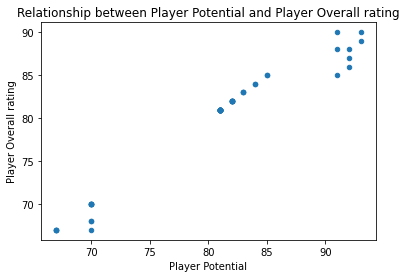

In [55]:
# Now let's Figure out the relationship between "Overall rating" and "Potential"
Kaka.plot.scatter(x='potential', y='overall_rating')
plt.title('Relationship between Player Potential and Player Overall rating')
plt.xlabel('Player Potential')
plt.ylabel("Player Overall rating")
plt.show()

From the above figure, we can notice that  "Over_all rating" is almost directly proportional to  "Potential attribute". This means that as "Potential attribute" increases, "Over_all rating" increases and as "Potential attribute" decreases, "Over_all rating" decreases.

       ****-----------------------------------------------------------------------****

<a id='conclusions'></a>
## Conclusions

At first, We have loaded libraries required.
Then, we performed data cleaning (removed duplicates, removed rows with Nan values, modified data types). 
Finally, Pedrformed our data analysis by answering some questions, and found answers:
    Who were the top ten players? (Lionel Messi leaded the rating) 
    Who were the top rated "Goalkeepers"? (Gianluigi Buffon leaded the rating)
    Who were the "Defenders" with the highest rating ? (Carles Puyol leaded the rating)
    Who were the "Midfielders" with the highest rating? (Xavi Hernandiz leaded the rating)
    Who were the "Forwards" with the highest rating ? (Cristiano Ronaldo leaded the rating)
    Which players had the highest penality kicking rating ? (Rickie Lambert leaded the rating)
    Who was the tallest player (in Centimeters) ? (Kristof van Hout)
    Who was the fastest player ?
    What was the most prefered foot between players (Right foot or Left foot ) ? (Right foot) 
    At which year did EA Sports' FIFA video game company make the most updates on         players_attributes ?  (2013)
    How does the Overall rating correlate with other players attributes ? (potential attribute).


Limitations:
____________
The limitations of the data analysis are:

Issues with the dataset:

we (almost always) find issues with the sample of data that we are working with (missing observations, data that appears to be inconsistent
Other limitations involve:

Issues with the methods of analysis:

Typically, a type of analysis that we would like to perform is not possible due to data limitations.
There is no statistical inference performed in your analysis (to test the significance of the results that you found). While this is not required, it is still a limitation of your analysis.

I think that there are more things that I can investigate with data, I can ask many and many questions, and link the information to get answers and make a very useful and strong conclusion about the data, but also I hope that I did well, and I will try and try to develop myself.